<a href="https://colab.research.google.com/github/YASER-ALUMIKANI/Mistral-7B-Instruct-v0.3/blob/main/Mistral_7B_Instruct_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huggingface With Langchain

Announcement Link: https://huggingface.co/blog/langchain


In [1]:
## Libraries Required
!pip install langchain-huggingface

!pip install huggingface_hub
!pip install transformers
!pip install accelerate
!pip install  bitsandbytes
!pip install langchain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinu

In [ ]:
# Import the userdata module from google.colab to handle user data securely
from google.colab import userdata

# Retrieve the Hugging Face Hub API token stored in the Colab userdata
# This ensures that the API token is handled securely and not hard-coded in the script
sec_key=userdata.get("HUGGINGFACEHUB_API_TOKEN")
print(sec_key)

To get your token login your acount in [Hugging Face's 🤗](https://huggingface.co/) then from setting ----> Access Tokens ---->New Token


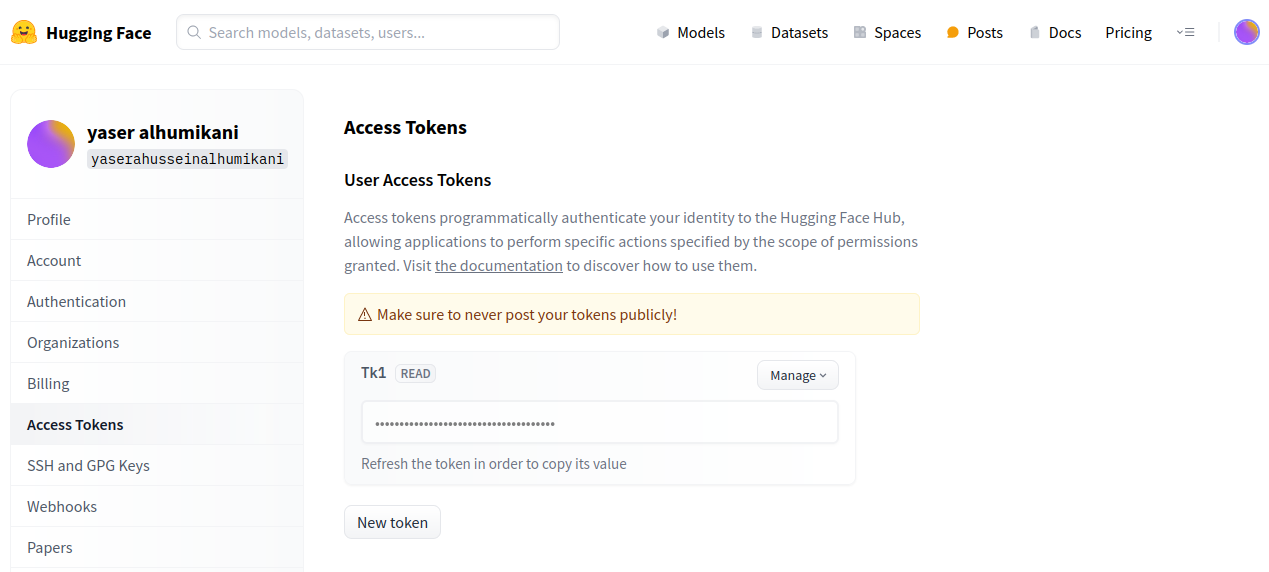

HuggingFaceEndpoint



In [3]:
# Import the HuggingFaceEndpoint class from the langchain_huggingface module
from langchain_huggingface import HuggingFaceEndpoint


Key Feature of HuggingFaceEndpoint:

  Model Access:
        Allows you to specify a model using its repository ID (repo_id).
        Supports various models available on Hugging Face Hub.

In [5]:
import os

# Set the environment variable "HUGGINGFACEHUB_API_TOKEN" to the value of sec_key
# This allows the Hugging Face API token to be used by any libraries or functions
# that require this token, without hard-coding it in the script

os.environ["HUGGINGFACEHUB_API_TOKEN"]=sec_key


## How to Access HuggingFace Models with API

There are two primary ways to use this class for accessing HuggingFace models.

1. **Using the `repo_id` Parameter**: You can specify the model by using the `repo_id` parameter. This approach utilizes the serverless API, which is especially advantageous for users with pro accounts or enterprise hub memberships.

2. **Connecting with HF Token**: Regular users can also access a substantial number of requests by connecting with their HuggingFace (HF) token in the environment where they are executing the code. This allows them to leverage the capabilities of HuggingFace models without needing a pro account.

In [6]:
# Specify the repository ID of the Hugging Face model you want to use
# In this case, it's the Mistral-7B-Instruct-v0.3 model
repo_id="mistralai/Mistral-7B-Instruct-v0.3"

llm=HuggingFaceEndpoint(repo_id=repo_id,  # Provide the repo_id to the HuggingFaceEndpoint
                        max_length=128, # Set the maximum length of the generated output to 128 tokens
                        temperature=0.7,   # Set the temperature for sampling (controls the creativity of the output)
                        token=sec_key  # Provide the Hugging Face Hub API token for authentication
                        )

                    max_length was transferred to model_kwargs.
                    Please make sure that max_length is what you intended.
                    token was transferred to model_kwargs.
                    Please make sure that token is what you intended.


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Configuration Options:

  **max_length**: Specifies the maximum length of the generated text.
  
  **temperature**: Controls the randomness of the generated text. A lower temperature makes the output more focused and deterministic, while a higher temperature increases creativity.

  **token**: API token for authentication, necessary for accessing Hugging Face's API services.

In [7]:
llm.invoke("do")

"i: 10.3934/amc.2021022\n\n## A new algorithm for solving linear systems over finite fields with the help of SageMath\n\nIn this paper, we present a new algorithm for solving linear systems over finite fields with the help of SageMath. The algorithm is based on Gaussian elimination method, which is one of the oldest and most fundamental algorithms in linear algebra. We also provide a detailed analysis of the algorithm's complexity, which shows that it is more efficient than the previous algorithms. In addition, we demonstrate the algorithm's effectiveness by solving several examples, including the solving of the linear system that represents the discrete logarithm problem in finite fields.\n\nMathematics Subject Classification: 68N10, 65F10.\nCitation: Youssef M. El-Sayed, Ahmed E. El-Sayed, Ahmed M. El-Sayed, M. Mostafa. A new algorithm for solving linear systems over finite fields with the help of SageMath. Advances in Mathematics of Communications, doi: 10.3934/amc.2021022"

In [8]:
from langchain import PromptTemplate, LLMChain

question="Who won the Cricket World Cup in the year 2011?"
template = """Question: {question}
              Answer: Let's think stepss by step."""
prompt = PromptTemplate(template=template, input_variables=["question"])
print(prompt)

input_variables=['question'] template="Question: {question}\n              Answer: Let's think stepss by step."


The `PromptTemplate` class simplifies the process of generating dynamic prompts, making it easier to work with language models in a more structured and reusable way.

for more details:
[Click Here](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/quick_start/)


In [9]:
llm_chain=LLMChain(llm=llm,prompt=prompt)
for key, value in llm_chain.invoke(question).items():
    print(f"{key}: {value}")


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


question: Who won the Cricket World Cup in the year 2011?
text: 
              1. We know the Cricket World Cup is held every four years.
              2. The last World Cup before 2011 was held in 2007, which was won by Australia.
              3. Therefore, the team that won the World Cup in 2011 couldn't be Australia, as they would have won back-to-back.
              4. The 2011 World Cup was won by India.
              5. So, India won the Cricket World Cup in the year 2011.


**Resources** :

https://arxiv.org/abs/2310.06825

https://www.youtube.com/watch?v=bFB4zqkcatU